<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Exploratory Data Analysis of an Alzheimer’s Disease Prediction Dataset</h1> </div>

This notebook presents an exploratory data analysis and predictive modeling study for Alzheimer’s disease using a clinical and demographic dataset of older adults.

The dataset contains information on 2,149 patients aged between 60 and 90 years and is used for educational purposes to analyze factors associated with Alzheimer’s disease and to evaluate the performance of multiple machine learning classification models.

The analysis includes an assessment of data completeness, statistical summaries, distribution analysis, correlation analysis, and visualization of key variables. Based on these findings, appropriate preprocessing techniques are applied to prepare the data for modeling.

- [Dataset Description](#data)
- [Loading the Dataset](#carga)
- [Data visualization](#visua)
- [Statistical Summary](#resumen)
- [Proportion of patients diagnosed](#diag)
- [Analysis of Outliers](#anali)
- [Relationship between Gender and Diagnosis](#rela)
- [Results](#results)
- [Conclusion](#conclusion)
- [References](#references)

<div id="data" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Dataset Description</h2> </div>

This dataset contains information on 2,149 patients between 60 and 90 years old, designed for educational purposes to analyze factors associated with Alzheimer’s Disease and to build Machine Learning models.

**Total number of variables (columns):** 35

**Target variable:** Diagnosis

* 0: Does not have Alzheimer’s
* 1: Has Alzheimer’s

**Task type:** Binary classification

Categories of included variables

The dataset is structured into different groups of variables:

**Identification**

* PatientID

**Demographic data (4 variables)**

* Age, Gender, Ethnicity, EducationLevel

**Lifestyle factors (6 variables)**

* BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality

**Medical history (6 variables)**

* FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes,
  Depression, HeadInjury, Hypertension

**Clinical measurements (6 variables)**

* SystolicBP, DiastolicBP, CholesterolTotal,
  CholesterolLDL, CholesterolHDL, CholesterolTriglycerides

**Cognitive and functional assessments (5 variables)**

* MMSE, FunctionalAssessment, MemoryComplaints,
  BehavioralProblems, ADL

**Symptoms (5 variables)**

* Confusion, Disorientation, PersonalityChanges,
  DifficultyCompletingTasks, Forgetfulness

**Diagnosis (1 variable — Target)**

* Diagnosis

**Confidential information (1 variable)**

* DoctorInCharge (fixed value “XXXConfid”)


In [1]:
import pandas as pd

# Dictionary with the preprocessing analysis data (translated)
data_transformacion = {
    'Id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
    'Variable': ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
    'Descripcion_Breve': [
        'Unique identifier', 'Age', 'Gender', 'Ethnicity', 'Education level', 'Body Mass Index', 'Smoking habit',
        'Weekly alcohol consumption', 'Weekly physical activity', 'Diet quality', 'Sleep quality',
        'Family history of Alzheimer’s', 'Cardiovascular disease', 'Diabetes', 'Depression',
        'History of head injury', 'Hypertension', 'Systolic Blood Pressure', 'Diastolic Blood Pressure',
        'Total Cholesterol', 'LDL Cholesterol', 'HDL Cholesterol', 'Triglycerides', 'MMSE score',
        'Functional assessment', 'Memory complaints', 'Behavioral problems', 'Activities of Daily Living',
        'Confusion', 'Disorientation', 'Personality changes', 'Difficulty completing tasks',
        'Forgetfulness', 'TARGET VARIABLE', 'Confidential information'
    ],
    'Tipo_Dato': [
        'Identifier', 'Numerical', 'Binary Categorical', 'Nominal Categorical', 'Ordinal Categorical', 'Numerical',
        'Binary Categorical', 'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Binary Categorical',
        'Binary Categorical', 'Binary Categorical', 'Binary Categorical', 'Binary Categorical',
        'Binary Categorical', 'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Numerical',
        'Numerical', 'Numerical', 'Binary Categorical', 'Binary Categorical', 'Numerical',
        'Binary Categorical', 'Binary Categorical', 'Binary Categorical', 'Binary Categorical',
        'Binary Categorical', 'Binary Categorical', 'Confidential'
    ],
    'Tecnica_Transformacion': [
        'Removed – does not contribute to the model', 'Standardization (StandardScaler)', 'No transformation', 'One-Hot Encoding', 'One-Hot Encoding',
        'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)',
        'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)',
        'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)',
        'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)',
        'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)',
        'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)',
        'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)', 'Standardization (StandardScaler)',
        'No transformation (Output)', 'Removed – does not contribute to the model'
    ]
}

# Create the DataFrame
df_transformacion = pd.DataFrame(data_transformacion)

df_transformacion


,Id,Variable,Descripcion_Breve,Tipo_Dato,Tecnica_Transformacion
0,1,PatientID,Unique identifier,Identifier,Removed – does not contribute to the model
1,2,Age,Age,Numerical,Standardization (StandardScaler)
2,3,Gender,Gender,Binary Categorical,No transformation
3,4,Ethnicity,Ethnicity,Nominal Categorical,One-Hot Encoding
4,5,EducationLevel,Education level,Ordinal Categorical,One-Hot Encoding
5,6,BMI,Body Mass Index,Numerical,Standardization (StandardScaler)
6,7,Smoking,Smoking habit,Binary Categorical,Standardization (StandardScaler)
7,8,AlcoholConsumption,Weekly alcohol consumption,Numerical,Standardization (StandardScaler)
8,9,PhysicalActivity,Weekly physical activity,Numerical,Standardization (StandardScaler)
9,10,DietQuality,Diet quality,Numerical,Standardization (StandardScaler)



<div id="carga" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Loading the Dataset</h2> </div>


In [2]:
import kagglehub
import os
from kagglehub import dataset_download
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image

In [3]:
path = dataset_download("rabieelkharoua/alzheimers-disease-dataset")

print("Dataset downloaded at:", path)
df = pd.read_csv(path + "/alzheimers_disease_data.csv")

Dataset downloaded at: C:\Users\user\.cache\kagglehub\datasets\rabieelkharoua\alzheimers-disease-dataset\versions\1


<div id="visua" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Data visualization</h2> </div>


In [4]:
data = df.copy()

print("Shape:", data.shape)
data.head()

Shape: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid



<div style="color:#37475a"><h2>General information</h2> </div>

---



In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64


<div style="color:#37475a"><h2>Null Values by Column</h2> </div>

---



In [20]:
print(data.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

The analysis of missing values shows that none of the variables in the dataset contain missing data. All 35 columns have a null value count of zero, indicating that the dataset is complete and does not require additional imputation or data cleaning processes related to missing values.

<div id="resumen" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Statistical Summary</h2> </div>

In [21]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Conclusion**

The statistical summary shows that the dataset contains 2,149 fully complete records and that the variables exhibit ranges and distributions consistent with real clinical and demographic data.

In general terms:

Numerical variables such as Age, BMI, AlcoholConsumption, PhysicalActivity, DietQuality, and the clinical measurements present minimum, maximum, and average values within plausible ranges for older adult patients.

The average age is 75 years, which is consistent with the population prone to developing Alzheimer’s disease.

Categorical variables encoded as Gender, Ethnicity, EducationLevel, and the binary variables related to symptoms and medical history are correctly represented with values ranging from 0 to 1.

Cognitive and functional scores (MMSE, FunctionalAssessment, ADL) show wide dispersion, indicating variability in the levels of cognitive and functional impairment within the sample.

The target variable Diagnosis takes values between 0 and 1, confirming that the task is a binary classification problem.

Additionally, the ranges and percentiles indicate that the dataset is well distributed, with no anomalous extreme values that could compromise the analysis. The variability observed across multiple variables suggests that the dataset is suitable for conducting comparative studies and building robust predictive models, as it contains diversity in risk factors, symptoms, and clinical conditions.

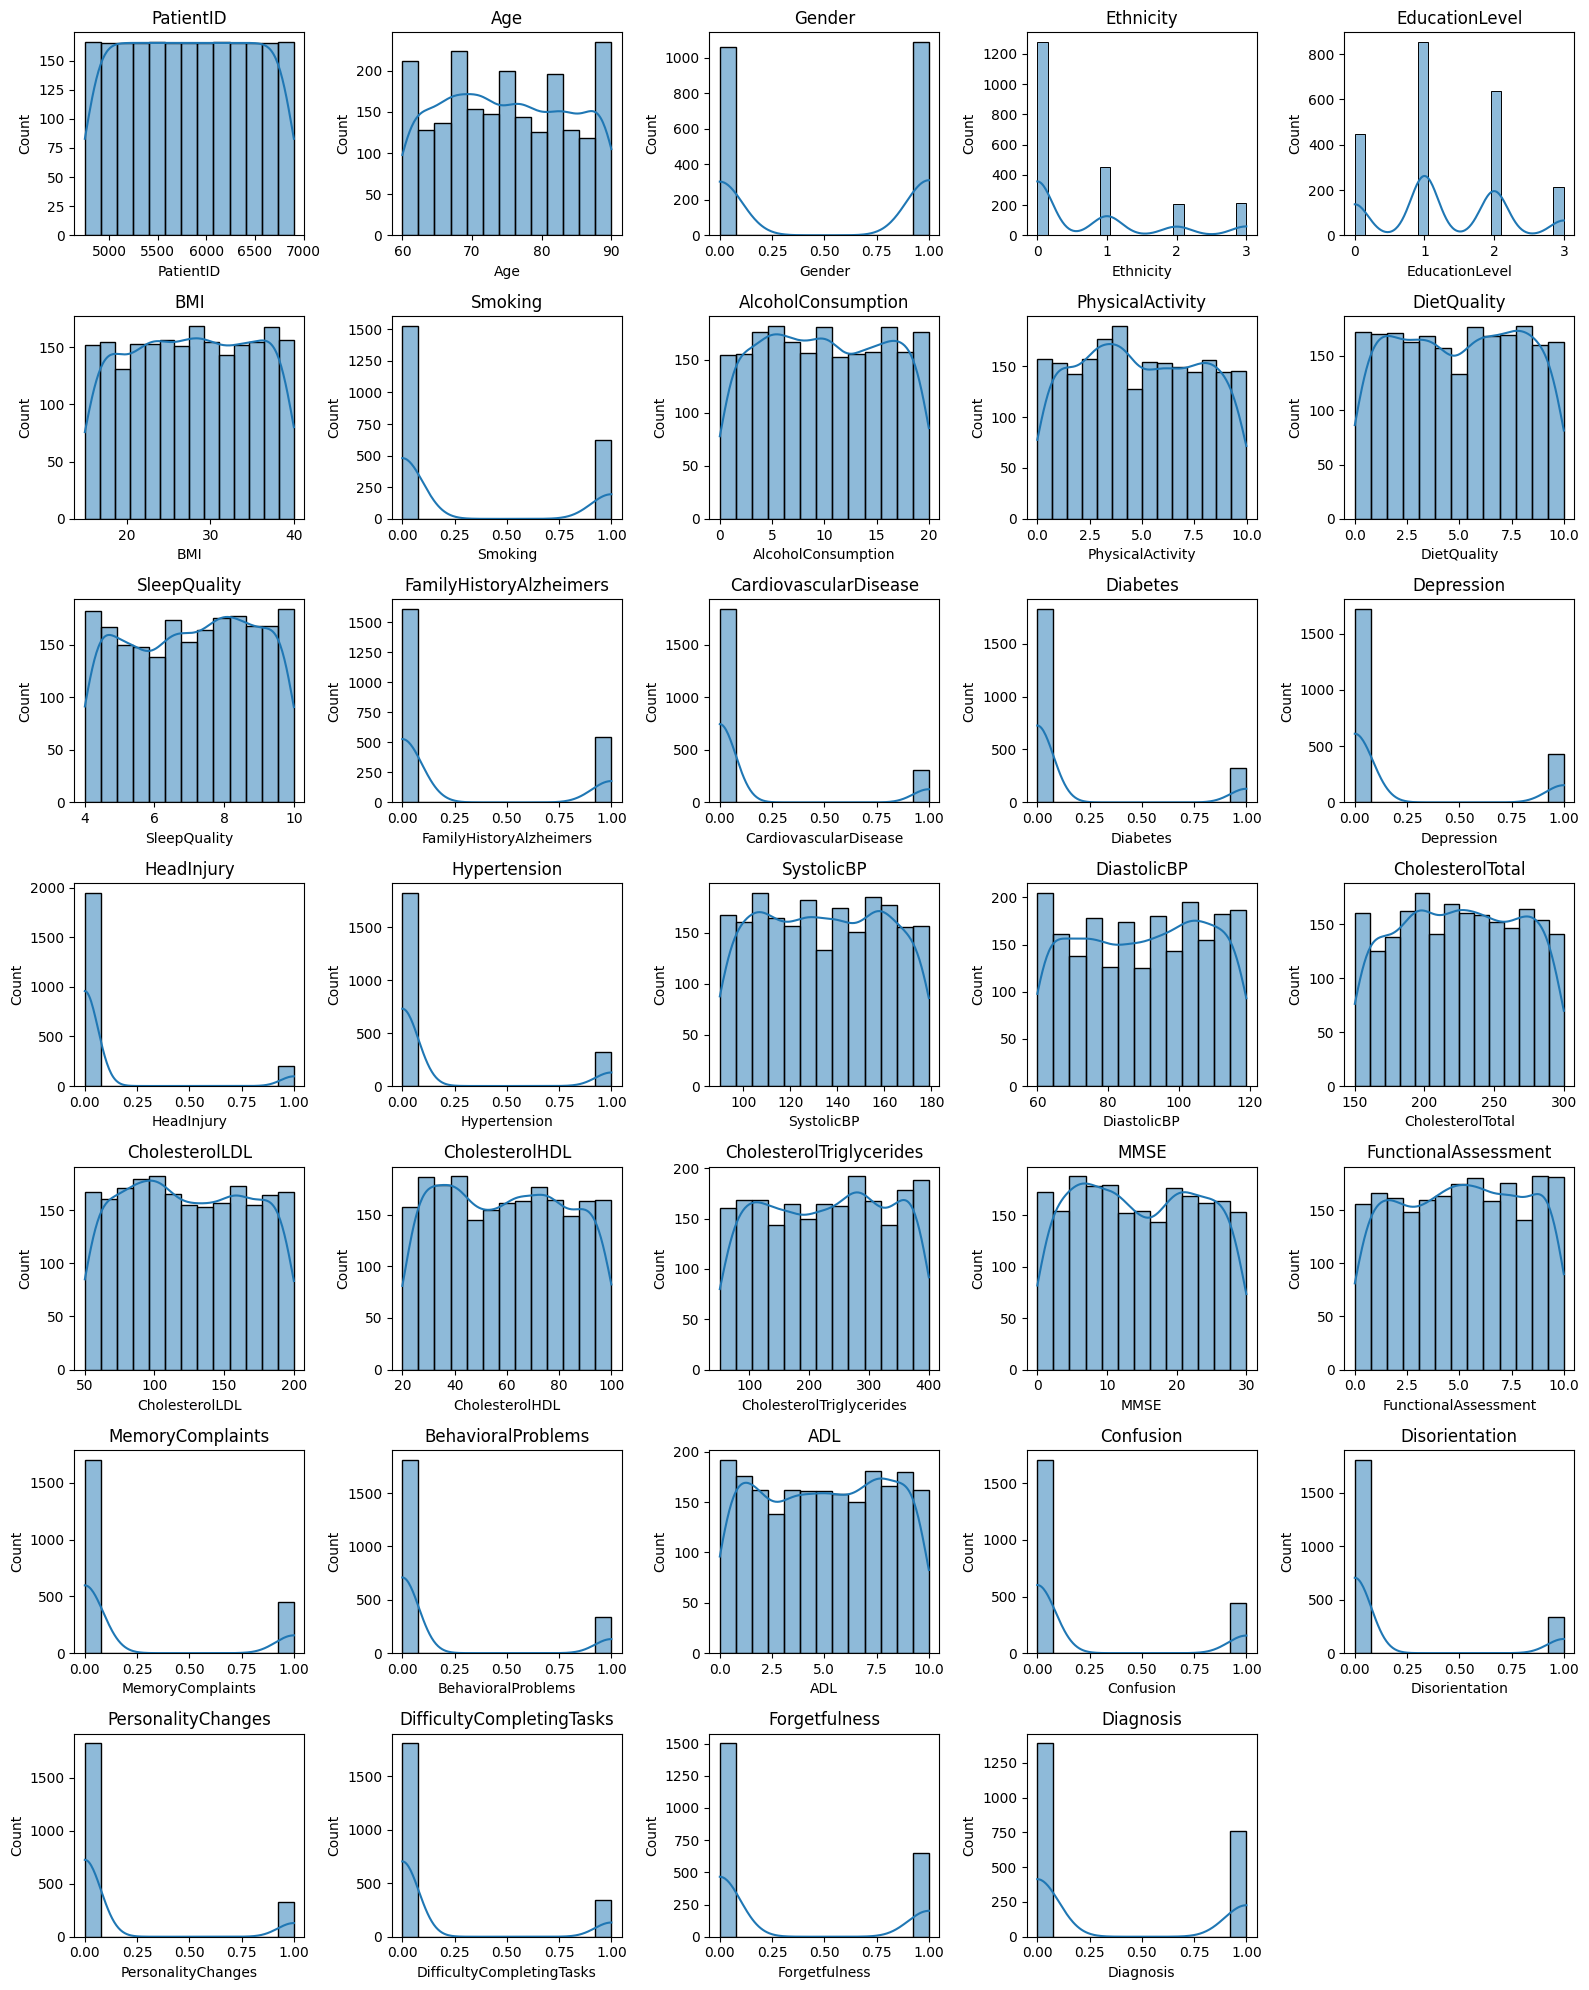

In [22]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(7, 5, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


<div id="diag" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Proportion of patients diagnosed</h2> </div>

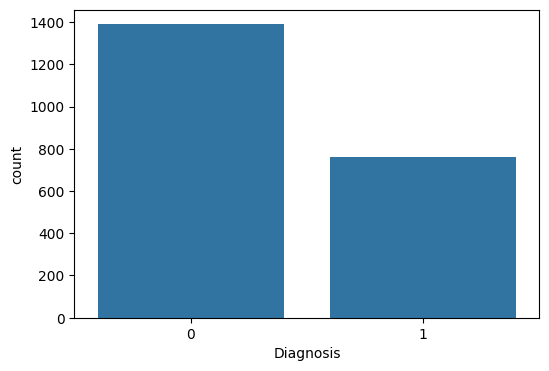


Proporción de pacientes diagnosticados:
Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64


In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="Diagnosis")
plt.show()

print("\nProportion of patients diagnosed:")
print(data["Diagnosis"].value_counts(normalize=True))


**Conclusion**

* **Negative Diagnosis (0 – No Alzheimer):** 64.63% of the patients were not diagnosed with Alzheimer’s disease.

* **Positive Diagnosis (1 – Yes Alzheimer):** 35.37% of the patients were diagnosed with Alzheimer’s disease.

<div id="anali" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Analysis of Outliers</h2> </div>

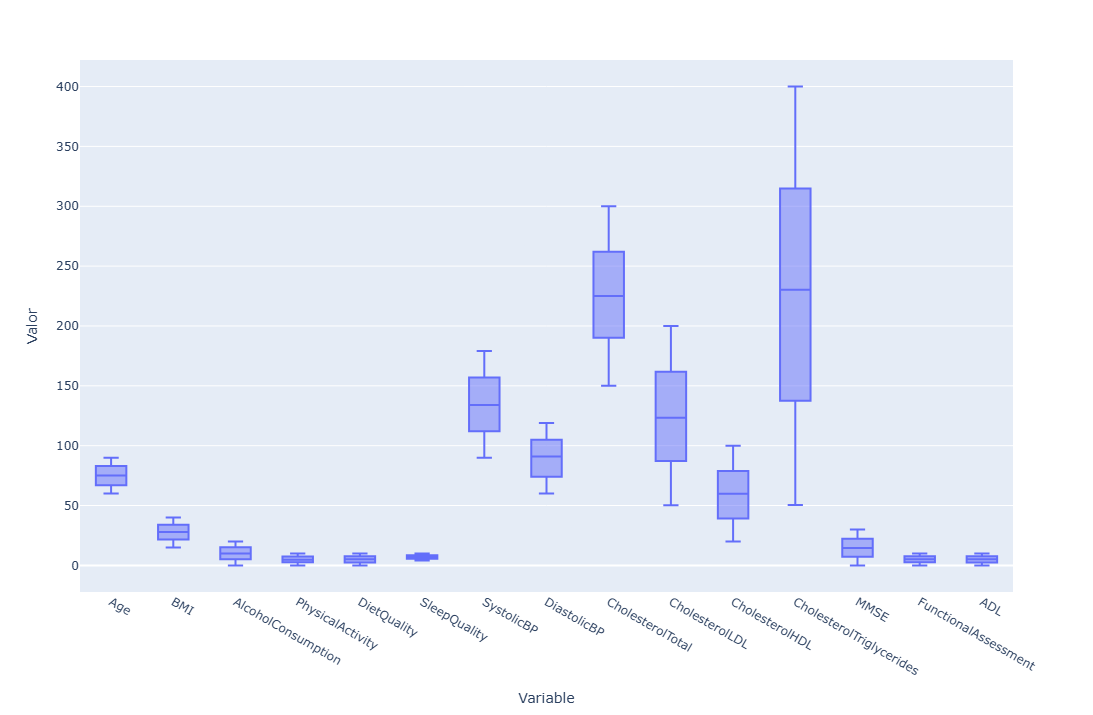

In [5]:
numeric_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'ADL'
]


fig = px.box(
    data[numeric_features].melt(var_name="Variable", value_name="Valor"),
    x="Variable",
    y="Valor"
)

fig.update_layout(height=700, width=1400)
fig.show()


**Conclusion**

**1. Range of values and dispersion:**

Variables such as CholesterolTriglycerides, CholesterolTotal, and SystolicBP show wide ranges and considerable variability.

Variables such as PhysicalActivity, DietQuality, and SleepQuality have smaller ranges and less dispersion.

**2. Visible outliers:**

Possible outliers are observed in BMI, AlcoholConsumption, SystolicBP, DiastolicBP, and CholesterolTriglycerides, as some values fall outside the whiskers of the boxplot.

This indicates the presence of patients with atypical values that could affect statistical analyses if not handled properly.

**3. Median comparison and symmetry:**

Variables such as Age, BMI, and CholesterolTotal show a centered median and moderate dispersion.

Variables such as CholesterolTriglycerides appear skewed toward higher values, with the median lower than the mean, indicating positive skewness.

**4. Variables with lower variability:**

PhysicalActivity, DietQuality, SleepQuality, and FunctionalAssessment show lower dispersion, indicating that most patients have similar values for these variables.

<div id="matriz" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Correlation Matrix</h2> </div>



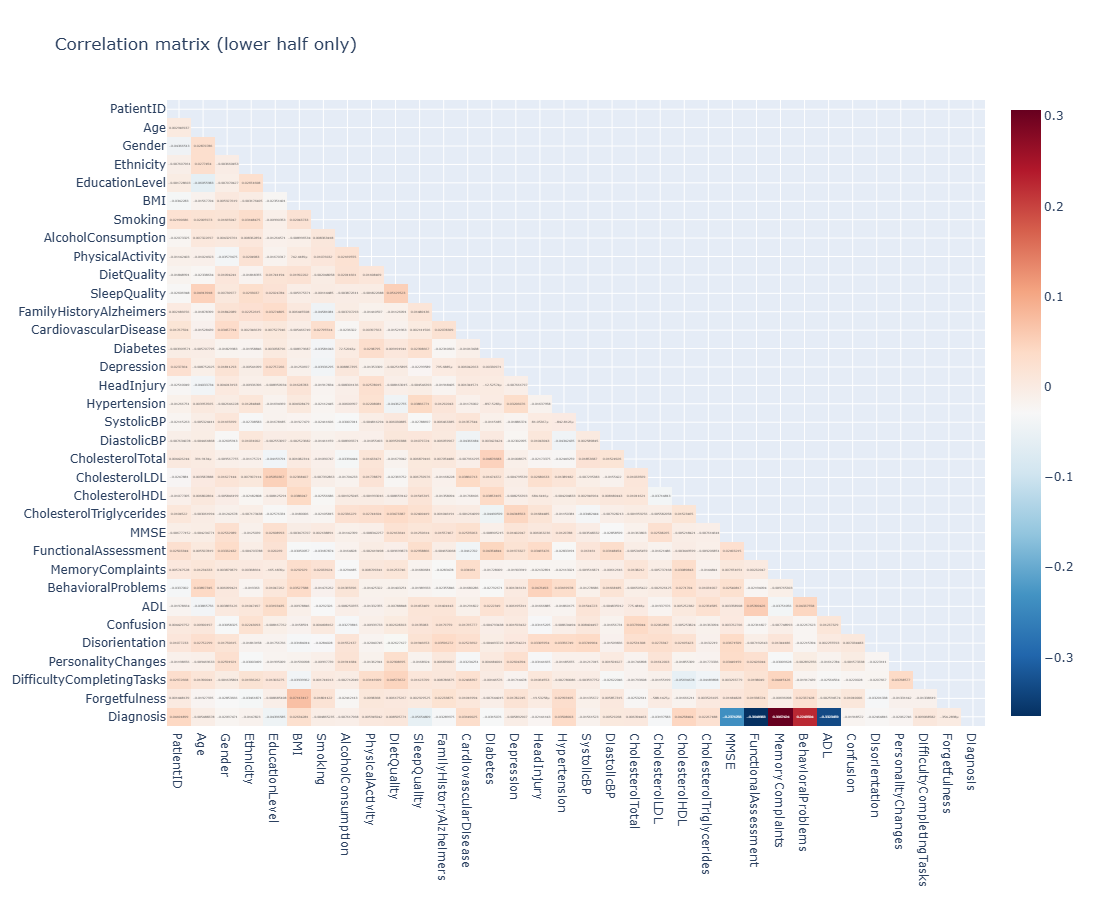

In [8]:
# Calculate correlation matrix
corr = data.corr(numeric_only=True)

# Create mask to hide the top half
mask = np.triu(np.ones_like(corr, dtype=bool))

# Apply mask (replace top half with NaN)
corr_masked = corr.mask(mask)

# Heatmap con Plotly
fig = px.imshow(
    corr_masked,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    aspect="auto",
    title="Correlation matrix (lower half only)"
)

fig.update_layout(height=900, width=900)
fig.show()

<div style="color:#37475a"><h2>Correlation Matrix (Selected Variables)</h2> </div>

---

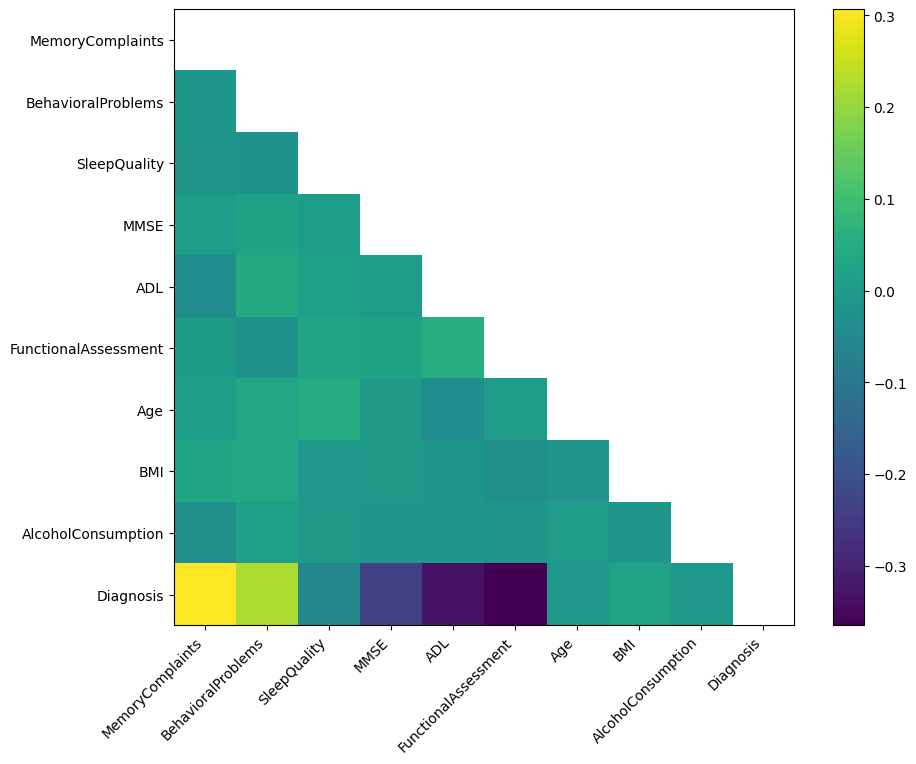

In [7]:
selected_vars = [
    "MemoryComplaints",
    "BehavioralProblems",
    "SleepQuality",
    "MMSE",
    "ADL",
    "FunctionalAssessment",
    "Age",
    "BMI",
    "AlcoholConsumption",
    "Diagnosis"
]

# Correlation Matrix
corr_reduced = data[selected_vars].corr(numeric_only=True)


mask = np.triu(np.ones_like(corr_reduced, dtype=bool))
corr_half = corr_reduced.mask(mask)

# Create figure
plt.figure(figsize=(10, 8))

# Draw heatmap
plt.imshow(corr_half, aspect='auto')

# Axle labels
plt.xticks(range(len(selected_vars)), selected_vars, rotation=45, ha="right")
plt.yticks(range(len(selected_vars)), selected_vars)


plt.colorbar()
plt.savefig("matriz_correlacion_diagnosis.png", dpi=300, bbox_inches="tight")
plt.show()

**Conclusion**

Analyzing the correlation of each variable with the target variable Diagnosis (Alzheimer):

**1. Variables with moderate positive correlation:**

MemoryComplaints (0.31) and BehavioralProblems (0.22). Patients who present memory complaints and behavioral problems tend to have a higher risk of Alzheimer’s disease.

**2. Variables with moderate negative correlation:**

MMSE (-0.24), ADL (-0.33), and FunctionalAssessment (-0.36)
* Higher cognitive and functional scores are associated with a lower risk of Alzheimer’s disease.
* This is consistent: less cognitive and functional impairment implies a lower probability of diagnosis.

**3. Variables with weak correlation:**

Most clinical and demographic factors (BMI, Hypertension, Diabetes, Age, Gender, Cholesterol, etc.) show very low correlations (close to 0). This indicates that on their own they are not strong predictors of Alzheimer’s disease, but they may be useful when combined in a multivariate model.

**4. Lifestyle and family history variables:**

FamilyHistoryAlzheimers (-0.03), Smoking (-0.004), AlcoholConsumption (-0.008). Very low individual correlation, therefore they are not determinant by themselves in this dataset.

<div id="rela" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Relationship between Gender and Diagnosis</h2> </div>



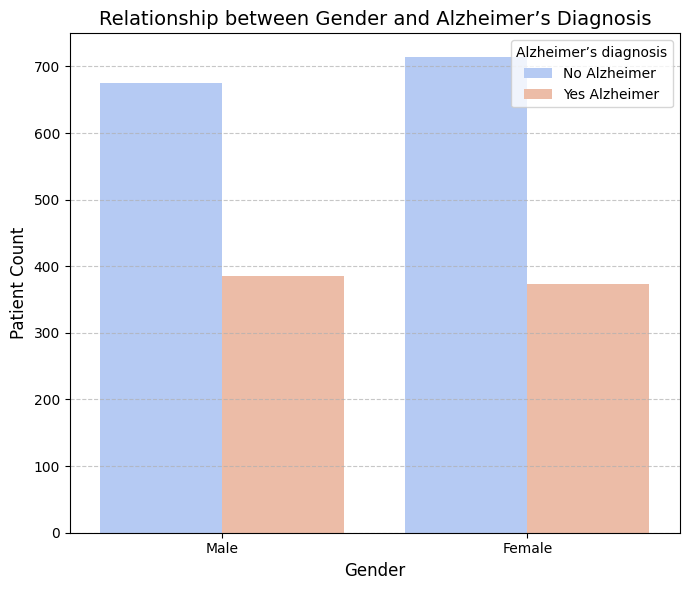

In [9]:
data['Diagnosis_Label'] = data['Diagnosis'].map({0: 'No Alzheimer', 1: 'Yes Alzheimer'})
# We also create readable labels for Gender
data['Gender_Label'] = data['Gender'].map({0: 'Male', 1: 'Female'})

# --- STEP 2: Generate the Plot ---
plt.figure(figsize=(7, 6))

# We use the new Gender_Label column on the X-axis and Diagnosis_Label for the color (hue)
sns.countplot(
    data=data,
    x="Gender_Label",
    hue="Diagnosis_Label",
    palette="coolwarm"  # An attractive color scheme
)

plt.title("Relationship between Gender and Alzheimer’s Diagnosis", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Patient Count", fontsize=12)
plt.legend(title="Alzheimer’s diagnosis")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

**Conclusion**

* The sample has a similar number of men (650) and women (700).

* In both genders, most patients do not have Alzheimer’s disease, while diagnosed cases are fewer.

* The proportion of Alzheimer’s diagnosis is very similar between men and women, so gender does not appear to be a determining factor in this dataset.

* In absolute numbers, Alzheimer’s cases are slightly higher in men (380) than in women (370), but the difference is minimal.

In other words, the risk of Alzheimer’s disease in this dataset is comparable between men and women.

<div id="results" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Results</h2> </div>

**Dataset status:**

* The dataset contains 2,149 complete records and 35 variables with no missing values.

* The ranges and distributions of the variables are consistent with clinical and demographic data.

**Distribution of Alzheimer’s diagnosis:**

* 64.63% of the patients do not have Alzheimer’s disease.

* 35.37% of the patients do have Alzheimer’s disease.

* The proportion of diagnosis is similar between men and women, so gender is not a determining factor in this sample.

**Variables correlated with Alzheimer’s disease:**

* Positively correlated: MemoryComplaints (0.31), BehavioralProblems (0.22).

* Negatively correlated: MMSE (-0.24), ADL (-0.33), FunctionalAssessment (-0.36).

* Clinical, demographic, and lifestyle variables show low individual correlations, indicating that their effect becomes more significant when combined in a multivariate model.

**Observations on distribution and outliers:**

* Possible outliers are identified in BMI, AlcoholConsumption, blood pressure, and cholesterol.

* Variables such as PhysicalActivity, DietQuality, and SleepQuality show low dispersion.

* The average age of the patients is 75 years, which is consistent with the population at risk for Alzheimer’s disease.

**Preparation for modeling and considerations:**

* Since the class of patients with Alzheimer’s disease represents only 35.37% of the total, there is class imbalance; therefore, it is recommended to apply techniques such as SMOTE to balance the minority class and avoid prediction bias.

* Several classification models should be tested (for example, KNN, Random Forest, Gradient Boosting, Logistic Regression) and their performance evaluated using metrics such as accuracy, precision, recall, F1-score, and AUC to determine which best fits the data.

* It is important to perform cross-validation and hyperparameter tuning to ensure model robustness and generalization.

* The identified outliers may require additional analysis or treatment depending on the model used, although they do not compromise the overall consistency of the dataset.

<div id="conclusion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conlcusion</h2> </div>

The dataset is complete, reliable, and suitable for statistical analysis and predictive modeling. Cognitive and functional indicators are the most relevant factors for Alzheimer’s risk, while other variables can add value in multivariate models. With proper preparation (class balancing, metric evaluation, and validation), it is possible to build robust models for predicting Alzheimer’s diagnosis.

<div id="references" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>References</h2> </div>

El Kharoua, R. (2024). Alzheimer's Disease Dataset. Kaggle. https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset